In [158]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
# the scheme
def explicit_first(u_array,j,delta_x,delta_t,v):
    # boundary conditions
    if j == 0:
        left = 0
        right = 1
    elif j == len(u_array)-1:
        left = j-1
        right = 1
    else:
        left = j-1
        right = j+1
    # this is just the equation for u_n+1 , j+1 = right, j-1 = left
    return u_array[j]+((v*delta_t)/(delta_x*delta_x))*(u_array[right]+u_array[left]-2*u_array[j])

# both of these just help calculate the analytic solution
def equation_w_sum(x,t,v,n):
    return math.sin((math.pi)*n/2)*math.sin(math.pi*n*x)*math.exp(-1*pow(math.pi*n,2)*v*t)
# sum from 0 to 100 rather than infinity gives a reasonable approximation to the real value
def analytic_solution(x,t,v):
    array = [equation_w_sum(x,t,v,n) for n in range(0,100)]
    return 2*np.sum(array)

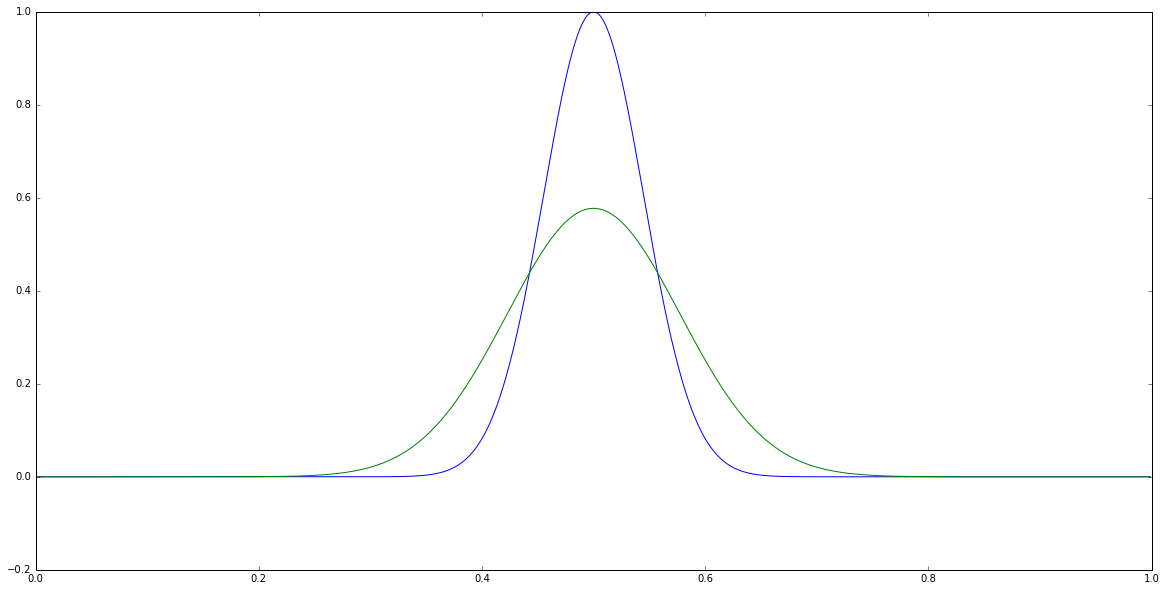

In [160]:
# initial conditions for the analytic solution
delta_x = 0.001
v = 0.001
t = 1
# initiate the grid
positions = np.arange(0,1,delta_x)
o_u_array = [analytic_solution(x,t,v) for x in positions]
# scale to 1.
u_array = o_u_array/np.max(o_u_array)
t = 3
new_u_array = [analytic_solution(x,t,v) for x in positions]
new_u_array = new_u_array/np.max(o_u_array)


plt.figure(figsize=(20,10))
plt.plot(positions,u_array,positions,new_u_array)

In [166]:
# returns the grid coordinates, u_array and the analytic solution
def numerical_solution(v,delta_x,delta_t,time_end):
    # increment in time, used in the for loop
    time = np.arange(1,time_end,delta_t)
    # create grid
    diff_positions = np.arange(0,1,delta_x)
    # initalise array with analytic solution
    # this is just a for loop where the analytic_solution(x,t,v) returned is appended to init_array
    t = 1
    # set initial conditions
    o_init_array = [analytic_solution(x,t,v) for x in diff_positions]
    u_array = o_init_array/np.max(o_init_array)
    # get the analytic solution to compute the relative error
    t = 3
    w_array = np.array([analytic_solution(x,t,v) for x in diff_positions])
    w_array = w_array/np.max(o_init_array)

    # loop through time and position
    for t in time:
        data = []
        # j allows us to index the position we are at to find the nearest neighbours
        for j,x in enumerate(diff_positions):
            data.append(explicit_first(u_array,j,delta_x,delta_t,v))
        u_array = data
    return diff_positions, u_array, w_array

In [167]:
# get the results and store in arrays
x1,array_02_t, w_array_02_t = numerical_solution(0.001,0.02,0.2,3)
x2,array_01_t, w_array_01_t = numerical_solution(0.001,0.02,0.1,3)
x3,array_005_t, w_array_005_t  = numerical_solution(0.001,0.02,0.05,3)
x4,array_002_x, w_array_002_x = numerical_solution(0.001,0.02,0.2,3)
x5,array_001_x, w_array_001_x = numerical_solution(0.001,0.01,0.2,3)
x6,array_0005_x, w_array_0005_x = numerical_solution(0.001,0.005,0.2,3)

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in true_divide
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide


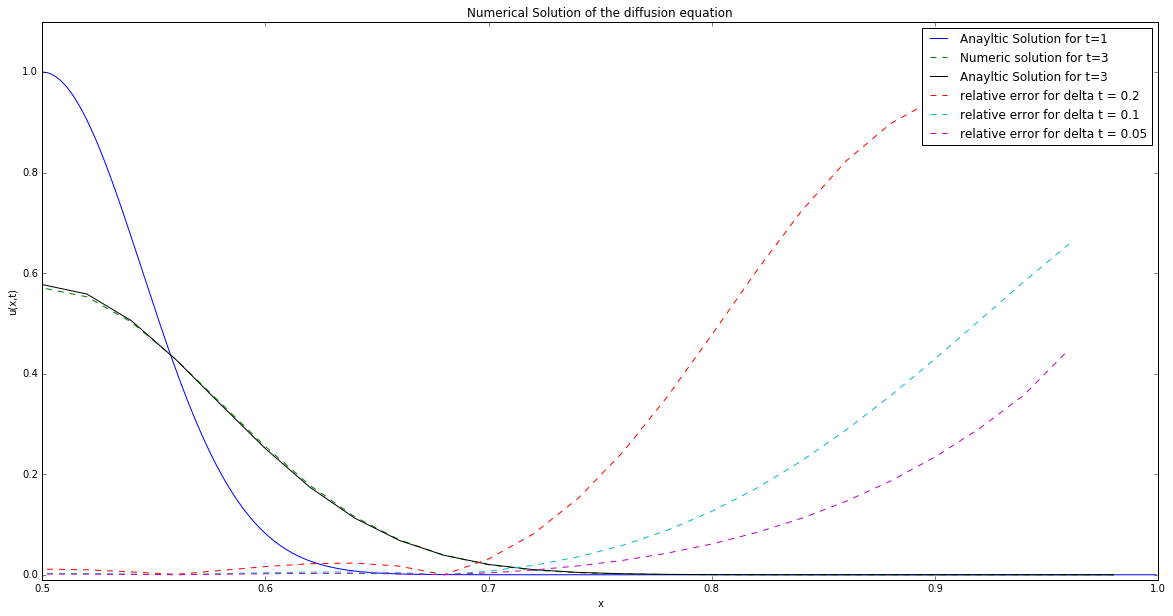

In [168]:
# plot the results
plt.figure(figsize=(20,10))
plt.title('Numerical Solution of the diffusion equation')
plt.ylabel('u(x,t)')
plt.xlabel('x')
plt.ylim(-0.01,1.1)
plt.xlim(0.5,1)
plt.plot(positions,u_array, label='Anayltic Solution for t=1')
plt.plot(x1,array_02_t,'--',label='Numeric solution for t=3')
plt.plot(x1,w_array_02_t,'k', label='Anayltic Solution for t=3')
plt.plot(x1[:-1],np.array(np.absolute(array_02_t-w_array_02_t)/w_array_02_t)[:-1], '--',label='relative error for delta t = 0.2')
plt.plot(x2[:-1],np.array(np.absolute(array_01_t-w_array_01_t)/w_array_01_t)[:-1], '--' ,label='relative error for delta t = 0.1')
plt.plot(x3[:-1],np.array(np.absolute(array_005_t-w_array_005_t)/w_array_005_t)[:-1],'--',  label='relative error for delta t = 0.05')
plt.legend()
plt.savefig('NumericalSDiffusion.png')

/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in true_divide
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/home/calum/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: RuntimeWarning: divide by zero encountered in true_divide


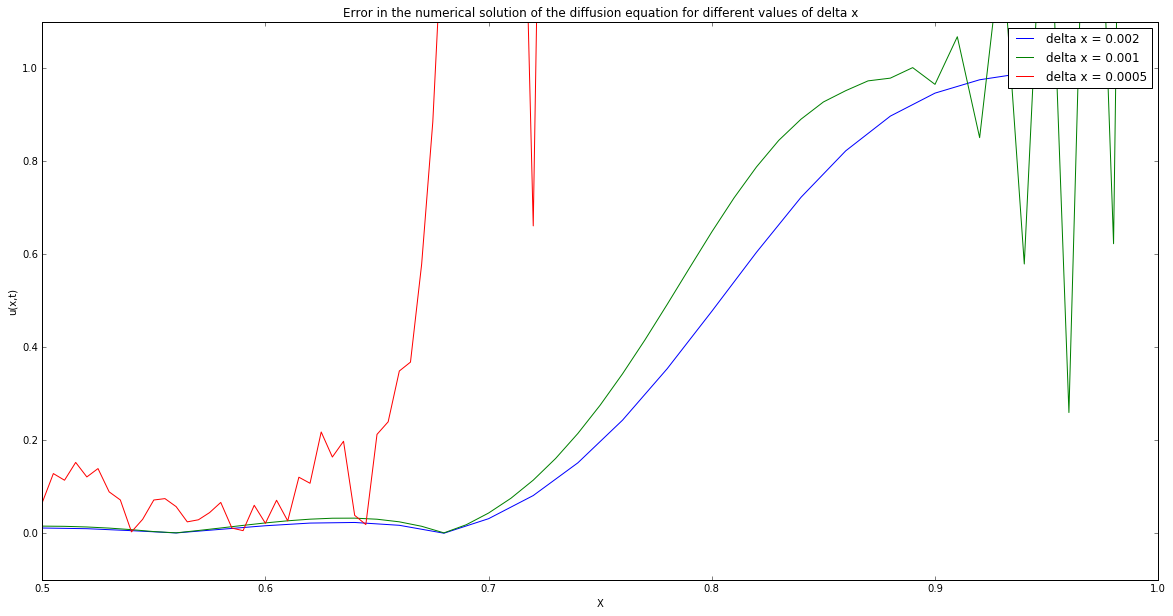

In [164]:
# plot the errors
plt.figure(figsize=(20,10))
plt.title('Error in the numerical solution of the diffusion equation for different values of delta x')
plt.ylabel('u(x,t)')
plt.xlabel('X')
plt.ylim(-0.1,1.1)
plt.xlim(0.5,1)
plt.plot(x4,np.absolute(array_002_x-w_array_002_x)/w_array_002_x,  label='delta x = 0.002')
plt.plot(x5,np.absolute(array_001_x-w_array_001_x)/w_array_001_x,  label='delta x = 0.001')
plt.plot(x6,np.absolute(array_0005_x-w_array_0005_x)/w_array_0005_x, label='delta x = 0.0005')
plt.legend()
plt.savefig('errorDeltax.png')